In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/mitm-dataset/training.csv")
print(df.head())

      srcip  srcport     dstip  dstport  proto  total_fpackets  total_fvolume  \
0  10.0.0.1    55628  10.0.0.2       80      6               6            426   
1  10.0.0.1    55629  10.0.0.2       80      6               6            426   
2  10.0.0.1    55630  10.0.0.2       80      6              12            738   
3  10.0.0.1    55631  10.0.0.2       80      6               6            426   
4  10.0.0.1    55632  10.0.0.2       80      6               6            426   

   total_bpackets  total_bvolume  min_fpktl  ...  sflow_bpackets  \
0               6           2771         52  ...               6   
1               6           2771         52  ...               6   
2              11           3031         52  ...              11   
3               6           2771         52  ...               6   
4               6           2771         52  ...               6   

   sflow_bbytes  fpsh_cnt  bpsh_cnt  furg_cnt  burg_cnt  total_fhlen  \
0          2771         1       

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   srcip           999 non-null    object
 1   srcport         999 non-null    int64 
 2   dstip           999 non-null    object
 3   dstport         999 non-null    int64 
 4   proto           999 non-null    int64 
 5   total_fpackets  999 non-null    int64 
 6   total_fvolume   999 non-null    int64 
 7   total_bpackets  999 non-null    int64 
 8   total_bvolume   999 non-null    int64 
 9   min_fpktl       999 non-null    int64 
 10  mean_fpktl      999 non-null    int64 
 11  max_fpktl       999 non-null    int64 
 12  std_fpktl       999 non-null    int64 
 13  min_bpktl       999 non-null    int64 
 14  mean_bpktl      999 non-null    int64 
 15  max_bpktl       999 non-null    int64 
 16  std_bpktl       999 non-null    int64 
 17  min_fiat        999 non-null    int64 
 18  mean_fiat 

In [4]:
df.isnull().sum()

srcip             0
srcport           0
dstip             0
dstport           0
proto             0
total_fpackets    0
total_fvolume     0
total_bpackets    0
total_bvolume     0
min_fpktl         0
mean_fpktl        0
max_fpktl         0
std_fpktl         0
min_bpktl         0
mean_bpktl        0
max_bpktl         0
std_bpktl         0
min_fiat          0
mean_fiat         0
max_fiat          0
std_fiat          0
min_biat          0
mean_biat         0
max_biat          0
std_biat          0
duration          0
min_active        0
mean_active       0
max_active        0
std_active        0
min_idle          0
mean_idle         0
max_idle          0
std_idle          0
sflow_fpackets    0
sflow_fbytes      0
sflow_bpackets    0
sflow_bbytes      0
fpsh_cnt          0
bpsh_cnt          0
furg_cnt          0
burg_cnt          0
total_fhlen       0
total_bhlen       0
class             0
label             0
dtype: int64

In [5]:
df.describe()

,srcport,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,mean_fpktl,max_fpktl,...,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,class,label
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.0,999.0,999.000000,999.000000,999.0,999.000000
mean,41433.465465,1548.781782,11.362362,11.128128,8.793213e+03,4.412412,1529.015015,446.429429,453.416416,500.583584,...,4.392392,1527.614615,0.520521,2.376376,0.0,0.0,376.980981,233.185185,0.0,1.926927
std,20803.667463,2237.416053,5.501031,34.070739,4.692401e+04,4.646209,1520.153854,553.083034,548.123879,515.697707,...,4.634992,1521.111716,0.538432,2.920881,0.0,0.0,692.381825,244.970320,0.0,0.972397
min,68.000000,25.000000,6.000000,1.000000,8.800000e+01,0.000000,0.000000,40.000000,43.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,28.000000,0.000000,0.0,1.000000
25%,39149.500000,80.000000,6.000000,6.000000,4.260000e+02,0.000000,0.000000,52.000000,62.000000,158.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,188.000000,0.000000,0.0,1.000000
50%,49691.000000,80.000000,6.000000,9.000000,6.860000e+02,6.000000,2771.000000,52.000000,71.000000,158.000000,...,6.000000,2771.000000,1.000000,2.000000,0.0,0.0,320.000000,320.000000,0.0,1.000000
75%,57790.000000,5004.000000,17.000000,11.000000,1.220400e+04,10.000000,3031.000000,1356.000000,1356.000000,1356.000000,...,10.000000,3031.000000,1.000000,7.000000,0.0,0.0,580.000000,528.000000,0.0,3.000000
max,65450.000000,5355.000000,17.000000,959.000000,1.300404e+06,12.000000,4195.000000,1356.000000,1356.000000,1356.000000,...,12.000000,4195.000000,5.000000,7.000000,0.0,0.0,19188.000000,632.000000,0.0,3.000000


In [6]:
import csv

# Load whitelist from a file
def load_whitelist(file_path):
    with open(file_path, 'r') as file:
        whitelist = set(ip.strip() for ip in file.readlines())
    return whitelist
def load_network_traffic_from_csv(csv_file):
    network_traffic = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            network_traffic.append({'srcip': row['srcip'], 'dstip': row['dstip']})
    return network_traffic

# Check if IP address is in whitelist
def is_ip_in_whitelist(ip, whitelist):
    return ip in whitelist

# Iterate through network traffic data and check against whitelist
def analyze_network_traffic(traffic_data, whitelist):
    suspicious_traffic = []
    for packet in traffic_data:
        src_ip = packet['srcip']
        dst_ip = packet['dstip']
        if not is_ip_in_whitelist(src_ip, whitelist) or not is_ip_in_whitelist(dst_ip, whitelist):
            suspicious_traffic.append(packet)
    return suspicious_traffic

# Example usage
def main():
    # Load whitelist
    whitelist = load_whitelist('/kaggle/input/whitelist/whitelist.txt')
    
#     # Simulated network traffic data (list of dictionaries with 'src_ip' and 'dst_ip' keys)
#     network_traffic = [
#         {'srcip': '192.168.1.100', 'dstip': '203.0.113.1'},
#         {'srcip': '10.0.0.1', 'dstip': '203.0.113.2'},
#         {'srcip': '10.0.0.1', 'dstip': '10.0.0.3'},
#         # Add more network traffic data here
#     ]
    csv_file = '/kaggle/input/mitm-dataset/training.csv'
    network_traffic = load_network_traffic_from_csv(csv_file)
    



    
    # Analyze network traffic and flag suspicious traffic
    suspicious_traffic = analyze_network_traffic(network_traffic, whitelist)
    
    # Output suspicious traffic
    for packet in suspicious_traffic:
        print(f"Suspicious traffic detected: {packet}")

if __name__ == "__main__":
    main()

    



Suspicious traffic detected: {'srcip': '0.0.0.0', 'dstip': '255.255.255.255'}
Suspicious traffic detected: {'srcip': '0.0.0.0', 'dstip': '255.255.255.255'}
Suspicious traffic detected: {'srcip': '0.0.0.0', 'dstip': '255.255.255.255'}
Suspicious traffic detected: {'srcip': '192.168.229.1', 'dstip': '224.0.0.252'}
Suspicious traffic detected: {'srcip': '192.168.229.1', 'dstip': '239.255.255.250'}
Suspicious traffic detected: {'srcip': '0.0.0.0', 'dstip': '255.255.255.255'}
Suspicious traffic detected: {'srcip': '192.168.229.1', 'dstip': '239.255.255.250'}
Suspicious traffic detected: {'srcip': '192.168.229.1', 'dstip': '224.0.0.252'}
Suspicious traffic detected: {'srcip': '192.168.229.1', 'dstip': '224.0.0.252'}
Suspicious traffic detected: {'srcip': '192.168.229.1', 'dstip': '192.168.229.255'}
Suspicious traffic detected: {'srcip': '192.168.229.1', 'dstip': '192.168.229.255'}
Suspicious traffic detected: {'srcip': '192.168.229.1', 'dstip': '239.255.255.250'}
Suspicious traffic detected:

In [7]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Load network traffic data from CSV file
network_traffic = pd.read_csv('/kaggle/input/mitm-dataset/training.csv')

# Feature selection
features = ['total_fpackets', 'total_fvolume', 'total_bpackets', 'total_bvolume']  # Add more features as needed

# Calculate mean or median values for each feature
mean_values = network_traffic[features].mean()
median_values = network_traffic[features].median()

# Define thresholds for anomalies based on deviations from mean or median values
threshold_multiplier = 200  # Adjust as needed
anomaly_thresholds = mean_values + threshold_multiplier * (mean_values - median_values)

# Label anomalies based on deviations from thresholds
anomalies = (network_traffic[features] > anomaly_thresholds).any(axis=1)

# Split data into features and labels
X = network_traffic[features]
y = anomalies.astype(int)  # Convert boolean anomalies to binary labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Model evaluation
predictions = model.predict(X_test)
print(classification_report(predictions, y_test))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        15
           1       0.93      1.00      0.96       185

    accuracy                           0.93       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.86      0.93      0.89       200



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sample

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Load network traffic data from CSV file
network_traffic = pd.read_csv('/kaggle/input/mitm-dataset/training.csv')

# Feature selection
features = ['duration']  # Add more features as needed

# Define thresholds for anomalies based on expected ranges
short_duration_threshold = 1  # Adjust as needed
long_duration_threshold = 1000  # Adjust as needed

# Label anomalies based on flow duration
network_traffic['anomaly'] = ((network_traffic['duration'] < short_duration_threshold) | 
                              (network_traffic['duration'] > long_duration_threshold)).astype(int)

# Split data into features and labels
X = network_traffic[features]
y = network_traffic['anomaly']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
predictions = model.predict(X_test)
print(classification_report(predictions, y_test))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Load network traffic data from CSV file
network_traffic = pd.read_csv('/kaggle/input/mitm-dataset/training.csv')

# Feature selection
features = ['proto']  # Add more features as needed

# Anomaly labeling based on unexpected protocols
expected_protocols = ['TCP', 'UDP', 'HTTP']  # Define expected protocols
network_traffic['anomaly'] = ~network_traffic['proto'].isin(expected_protocols)

# Encode categorical feature: protocol
X = pd.get_dummies(network_traffic[features])

# Labels
y = network_traffic['anomaly']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
predictions = model.predict(X_test)
print(classification_report(predictions, y_test))


              precision    recall  f1-score   support

        True       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Load network traffic data from CSV file
network_traffic = pd.read_csv('/kaggle/input/mitm-dataset/training.csv')

# Feature selection
features = ['std_fpktl', 'std_bpktl']  # Add more features as needed

# Define thresholds for anomalies based on expected ranges
threshold_multiplier = 2  # Adjust as needed
anomaly_thresholds = network_traffic[features].mean() + threshold_multiplier * network_traffic[features].std()

# Anomaly labeling based on higher than usual standard deviations
network_traffic['anomaly'] = (network_traffic['std_fpktl'] > anomaly_thresholds['std_fpktl']) | (network_traffic['std_bpktl'] > anomaly_thresholds['std_bpktl'])

# Features and labels
X = network_traffic[features]
y = network_traffic['anomaly'].astype(int)  # Convert boolean anomalies to binary labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
predictions = model.predict(X_test)
print(classification_report(predictions, y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00         2

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



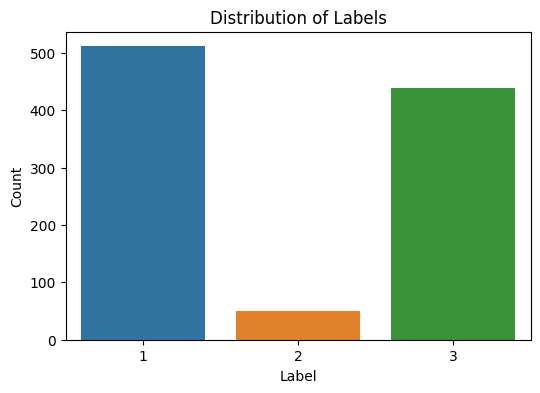

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


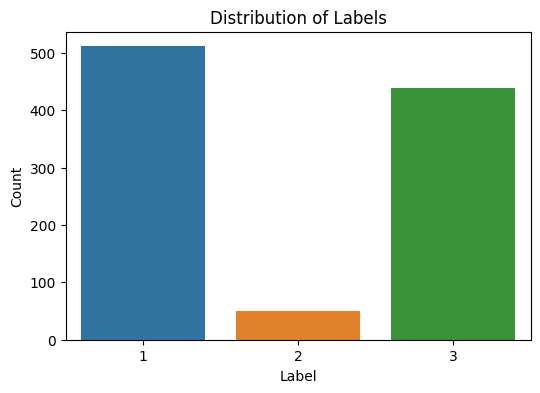

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

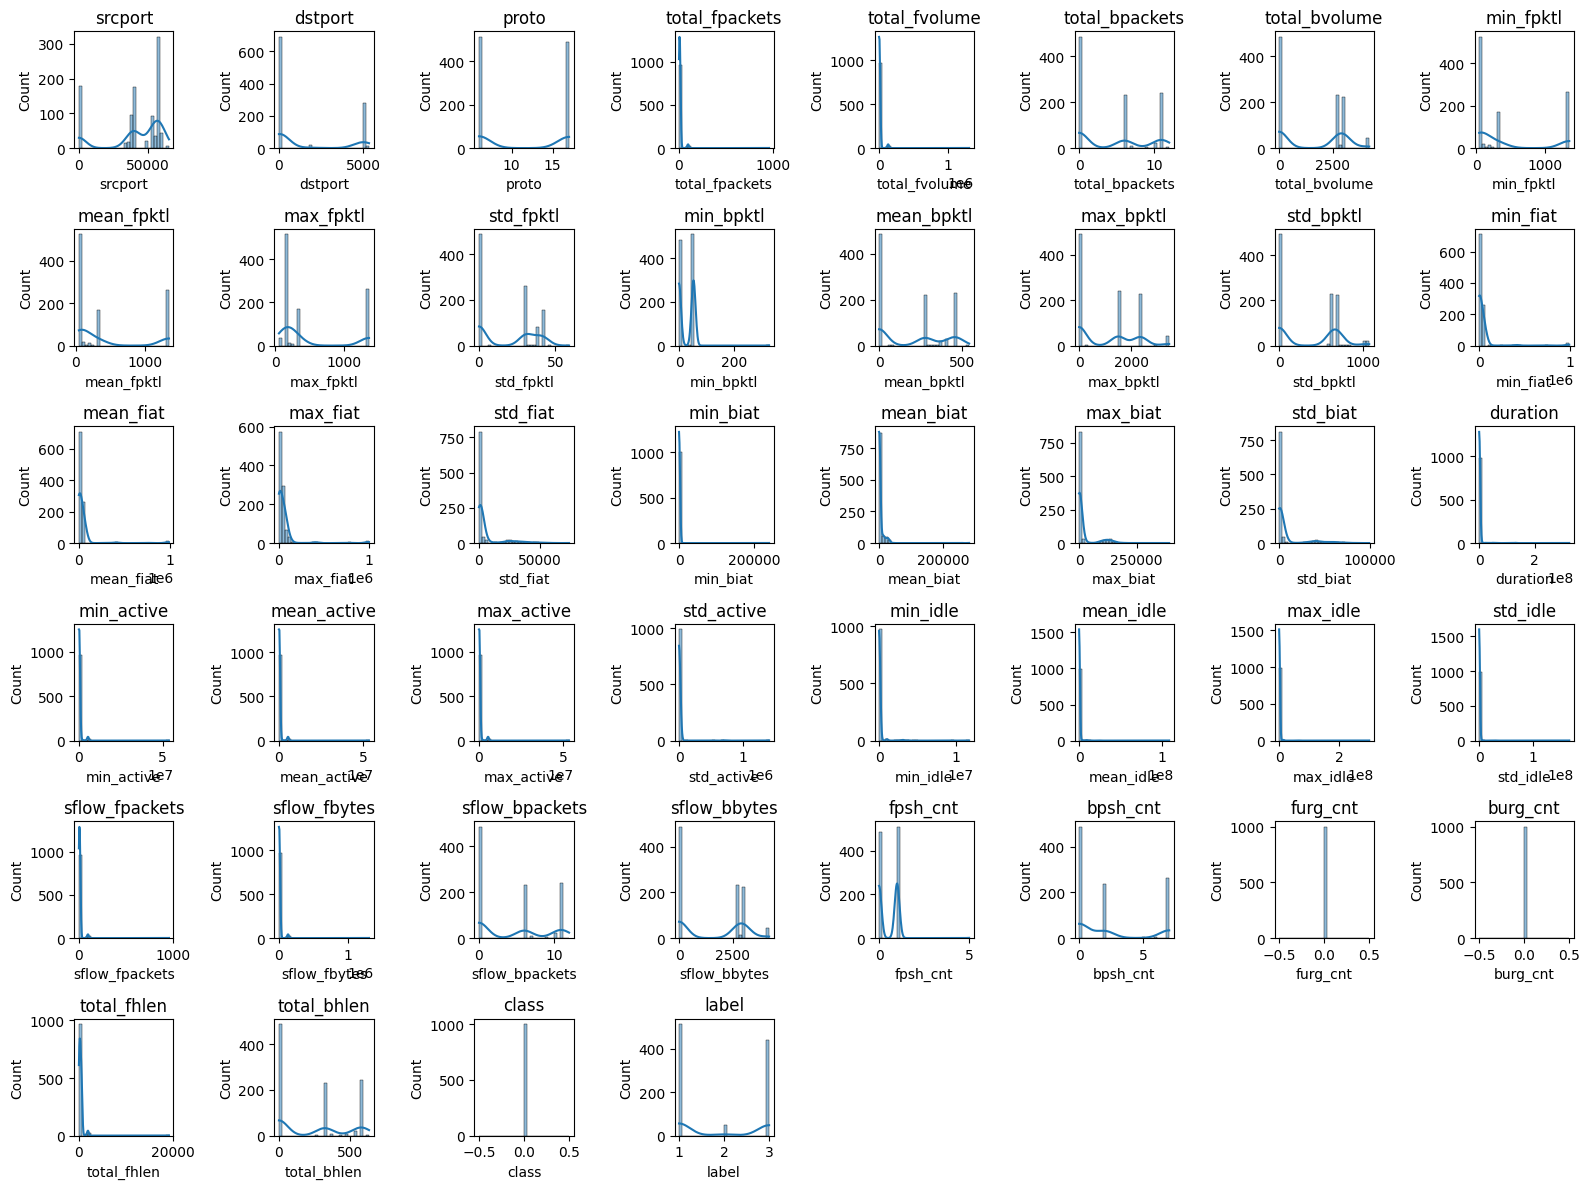

In [12]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Plot the distribution of some numerical features
plt.figure(figsize=(16, 12))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(6, 8, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('/kaggle/input/mitm-dataset/training.csv')

# Replace infinite values with NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (if any)
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop(columns='label')
y = df['label']

# Identify object columns
object_columns = X.select_dtypes(include=['object']).columns

# Convert numeric-like object columns to floats
for col in object_columns:
    try:
        X[col] = X[col].astype(float)
    except ValueError:
        pass  # If conversion fails, it means the column is categorical

# Re-identify object columns after conversion
object_columns = X.select_dtypes(include=['object']).columns

# Define a ColumnTransformer to handle both numerical and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = object_columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


# Apply the transformations to the dataset
X_preprocessed = preprocessor.fit_transform(X)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train distribution:\n{y_train.value_counts()}')
print(f'y_test distribution:\n{y_test.value_counts()}')


X_train shape: (799, 58)
X_test shape: (200, 58)
y_train distribution:
label
1    409
3    350
2     40
Name: count, dtype: int64
y_test distribution:
label
1    102
3     88
2     10
Name: count, dtype: int64


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Use the preprocessed training data
    y_pred = model.predict(X_test)  # Predict on the preprocessed test data
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 60)



Model: Logistic Regression
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       102
           2       0.89      0.80      0.84        10
           3       0.97      0.99      0.98        88

    accuracy                           0.98       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.98      0.98      0.98       200

[[101   0   1]
 [  0   8   2]
 [  0   1  87]]
------------------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       102
           2       0.89      0.80      0.84        10
           3       0.97      0.99      0.98        88

    accuracy                           0.98       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.98      0.98      0.98       200

[[101   0   1]
 [  0   8   2]
 [  0   1  87]]
-------------------------------------

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/kaggle/input/mitm-dataset/training.csv')

# Replace infinite values with NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (if any)
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop(columns='label')
y = df['label']

# Store the srcip and destip for later use
srcip_dstip = df[['srcip', 'dstip']]

# Identify object columns
object_columns = X.select_dtypes(include=['object']).columns

# Convert numeric-like object columns to floats
for col in object_columns:
    try:
        X[col] = X[col].astype(float)
    except ValueError:
        pass  # If conversion fails, it means the column is categorical

# Re-identify object columns after conversion
object_columns = X.select_dtypes(include=['object']).columns

# Define a ColumnTransformer to handle both numerical and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = object_columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply the transformations to the dataset
X_preprocessed = preprocessor.fit_transform(X)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 60)
    
    # Identify MitM attacks (assuming 'MitM' is the label for attacks)
    mitm_label = 2  # Replace with the correct label value for MitM attacks
    mitm_indices = np.where(y_pred == mitm_label)[0]
    mitm_ips = srcip_dstip.iloc[mitm_indices]
    
    print(f"MitM Attack Instances for {model_name}:")
    print(mitm_ips)
    print("-" * 60)


Model: Logistic Regression
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       102
           2       0.89      0.80      0.84        10
           3       0.97      0.99      0.98        88

    accuracy                           0.98       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.98      0.98      0.98       200

[[101   0   1]
 [  0   8   2]
 [  0   1  87]]
------------------------------------------------------------
MitM Attack Instances for Logistic Regression:
        srcip     dstip
16   10.0.0.1  10.0.0.2
63   10.0.0.3  10.0.0.2
72   10.0.0.3  10.0.0.2
94   10.0.0.3  10.0.0.2
139  10.0.0.1  10.0.0.2
141  10.0.0.1  10.0.0.2
176  10.0.0.1  10.0.0.2
194  10.0.0.3  10.0.0.2
198  10.0.0.3  10.0.0.2
------------------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       102
       

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the training dataset
df = pd.read_csv('/kaggle/input/mitm-dataset/training.csv')

# Replace infinite values with NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (if any)
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop(columns='label')
y = df['label']

# Store the srcip and dstip for later use
srcip_dstip = df[['srcip', 'dstip']]

# Identify object columns
object_columns = X.select_dtypes(include=['object']).columns

# Convert numeric-like object columns to floats
for col in object_columns:
    try:
        X[col] = X[col].astype(float)
    except ValueError:
        pass  # If conversion fails, it means the column is categorical

# Re-identify object columns after conversion
object_columns = X.select_dtypes(include=['object']).columns

# Define a ColumnTransformer to handle both numerical and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = object_columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply the transformations to the dataset
X_preprocessed = preprocessor.fit_transform(X)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 60)
    
    # Identify MitM attacks (assuming 'MitM' is the label for attacks)
    mitm_label = 2  # Replace with the correct label value for MitM attacks
    mitm_indices = np.where(y_pred == mitm_label)[0]
    mitm_ips = srcip_dstip.iloc[mitm_indices]
    
    print(f"MitM Attack Instances for {model_name}:")
    print(mitm_ips)
    print("-" * 60)

# Load the test dataset
test_df = pd.read_csv('/kaggle/input/testing/test.csv')

# Check if 'label' column exists in the test dataset
if 'label' in test_df.columns:
    X_test_new = test_df.drop(columns='label')
    y_test_new = test_df['label']
else:
    X_test_new = test_df
    y_test_new = None

# Store the srcip and dstip for later use
srcip_dstip_test = test_df[['srcip', 'dstip']]

# Convert numeric-like object columns to floats
object_columns_test = X_test_new.select_dtypes(include=['object']).columns
for col in object_columns_test:
    try:
        X_test_new[col] = X_test_new[col].astype(float)
    except ValueError:
        pass  # If conversion fails, it means the column is categorical

# Re-identify object columns after conversion
object_columns_test = X_test_new.select_dtypes(include=['object']).columns

# Apply the same preprocessor to the test dataset
X_test_preprocessed = preprocessor.transform(X_test_new)

# Train and evaluate the models on the new test dataset
for model_name, model in models.items():
    y_pred_new = model.predict(X_test_preprocessed)
    
    if y_test_new is not None:
        print(f"Model: {model_name}")
        print(classification_report(y_test_new, y_pred_new))
        print(confusion_matrix(y_test_new, y_pred_new))
        print("-" * 60)
    
    # Identify MitM attacks (assuming 'MitM' is the label for attacks)
    mitm_label = 2  # Replace with the correct label value for MitM attacks
    mitm_indices_new = np.where(y_pred_new == mitm_label)[0]
    mitm_ips_new = srcip_dstip_test.iloc[mitm_indices_new]
    
    print(f"MitM Attack Instances for {model_name}:")
    print(mitm_ips_new)
    print("-" * 60)


Model: Logistic Regression
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       102
           2       0.89      0.80      0.84        10
           3       0.97      0.99      0.98        88

    accuracy                           0.98       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.98      0.98      0.98       200

[[101   0   1]
 [  0   8   2]
 [  0   1  87]]
------------------------------------------------------------
MitM Attack Instances for Logistic Regression:
        srcip     dstip
16   10.0.0.1  10.0.0.2
63   10.0.0.3  10.0.0.2
72   10.0.0.3  10.0.0.2
94   10.0.0.3  10.0.0.2
139  10.0.0.1  10.0.0.2
141  10.0.0.1  10.0.0.2
176  10.0.0.1  10.0.0.2
194  10.0.0.3  10.0.0.2
198  10.0.0.3  10.0.0.2
------------------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       102
       

Model: Logistic Regression
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       102
           2       0.89      0.80      0.84        10
           3       0.97      0.99      0.98        88

    accuracy                           0.98       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.98      0.98      0.98       200

[[101   0   1]
 [  0   8   2]
 [  0   1  87]]
------------------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       102
           2       0.89      0.80      0.84        10
           3       0.97      0.99      0.98        88

    accuracy                           0.98       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.98      0.98      0.98       200

[[101   0   1]
 [  0   8   2]
 [  0   1  87]]
-------------------------------------

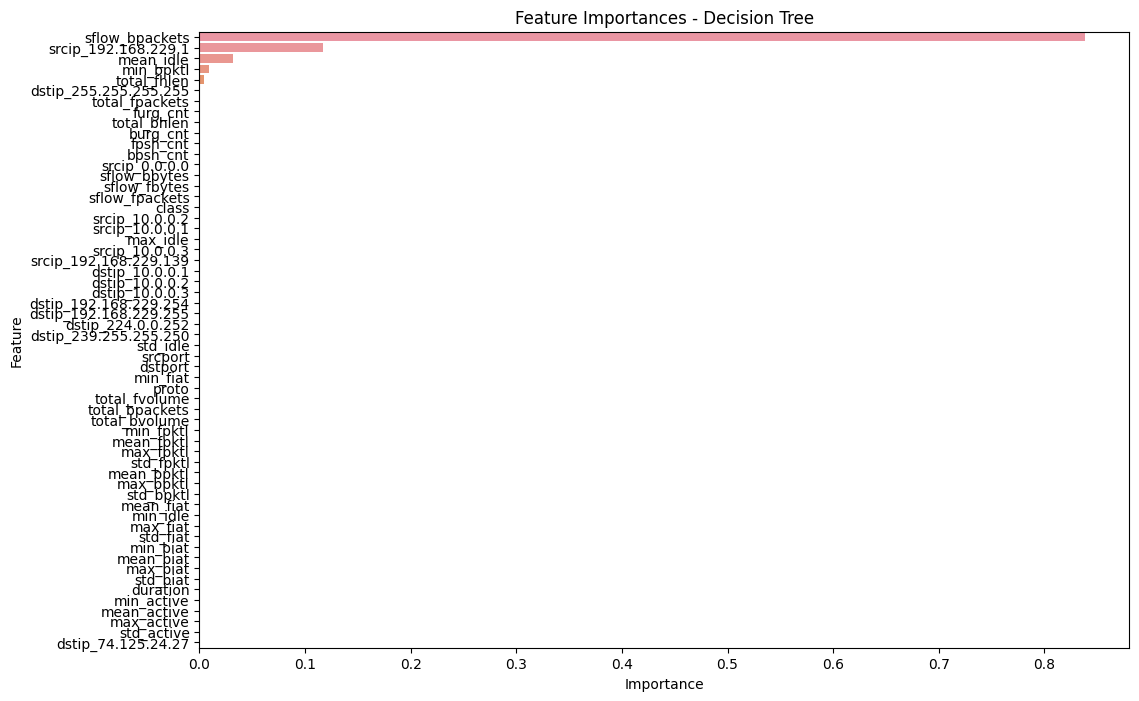

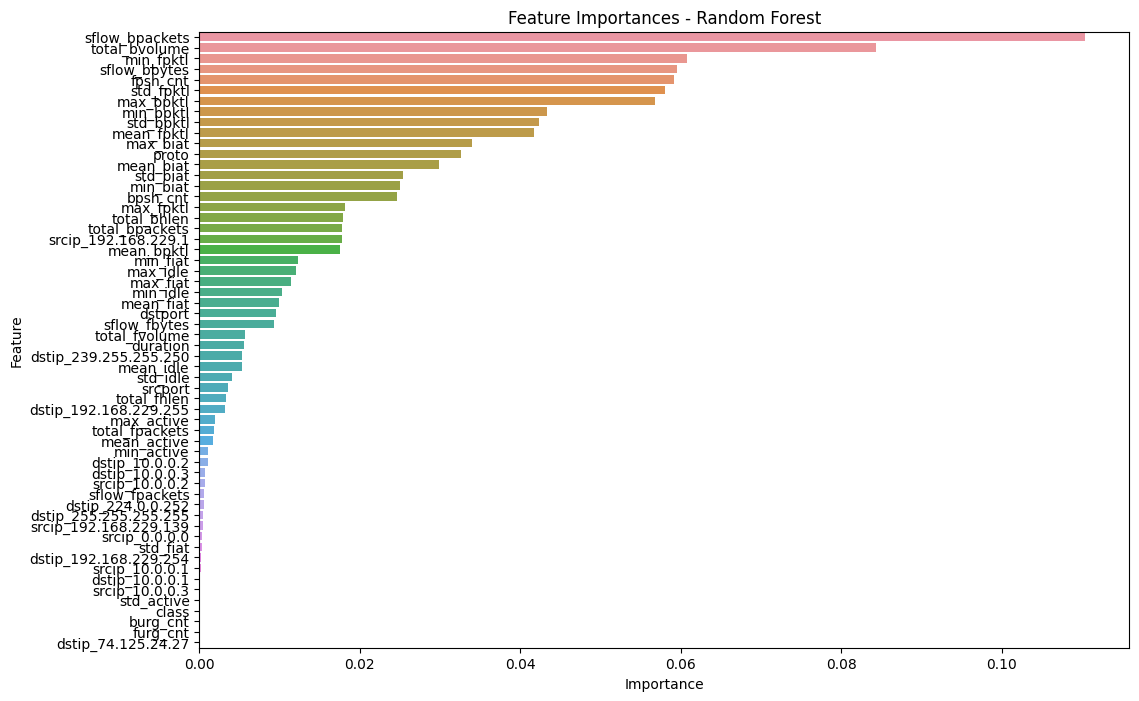

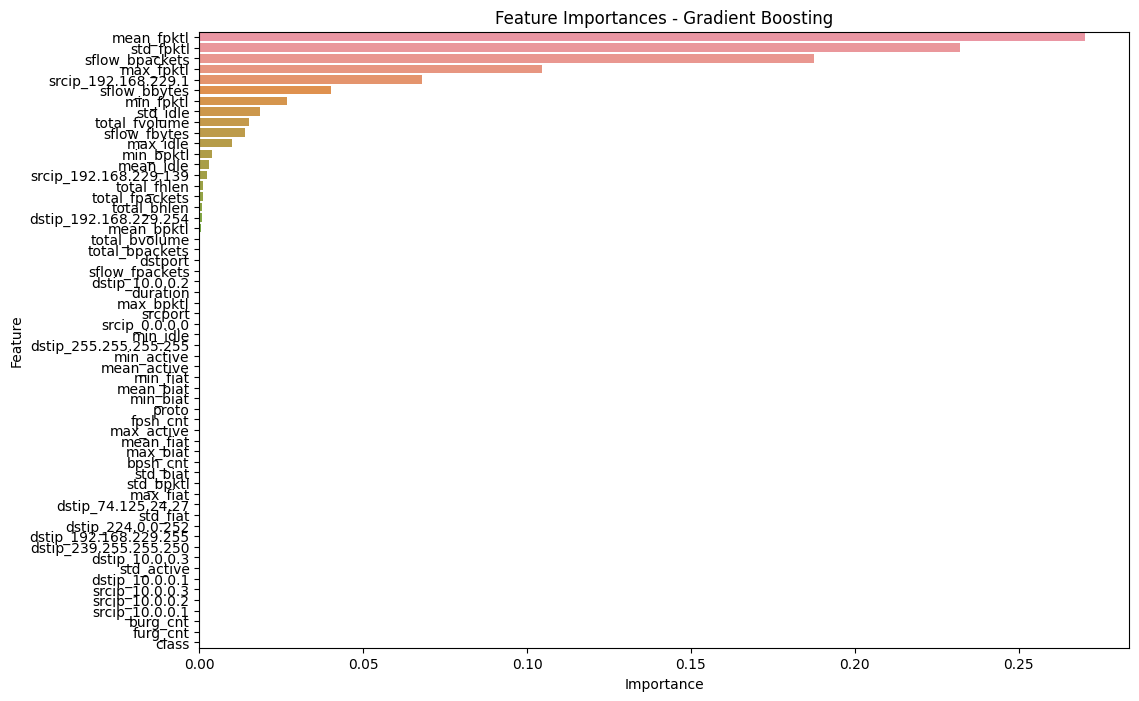

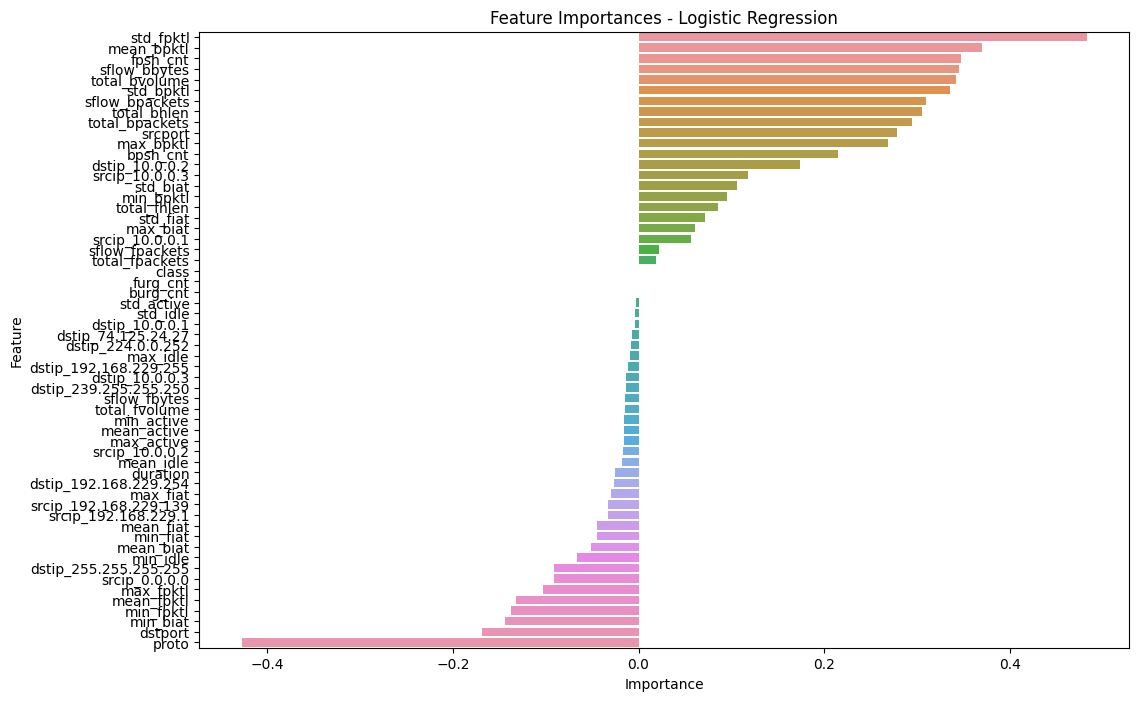

Feature importance analysis complete.


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/mitm-dataset/training.csv')

# Replace infinite values with NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (if any)
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop(columns='label')
y = df['label']

# Store the srcip and dstip for later use
srcip_dstip = df[['srcip', 'dstip']]

# Identify object columns
object_columns = X.select_dtypes(include=['object']).columns

# Convert numeric-like object columns to floats
for col in object_columns:
    try:
        X[col] = X[col].astype(float)
    except ValueError:
        pass  # If conversion fails, it means the column is categorical

# Re-identify object columns after conversion
object_columns = X.select_dtypes(include=['object']).columns

# Define a ColumnTransformer to handle both numerical and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = object_columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply the transformations to the dataset
X_preprocessed = preprocessor.fit_transform(X)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 60)

# Feature importance extraction
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importances - {model_name}')
    plt.show()

# Get feature names after preprocessing
preprocessed_feature_names = (
    numeric_features.tolist() +
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
)

# Plot feature importance for tree-based models
for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        plot_feature_importance(importances, preprocessed_feature_names, model_name)

# Logistic Regression does not provide direct feature importance but you can use the coefficients
if 'Logistic Regression' in models:
    model = models['Logistic Regression']
    if hasattr(model, 'coef_'):
        importances = model.coef_[0]
        plot_feature_importance(importances, preprocessed_feature_names, 'Logistic Regression')

print("Feature importance analysis complete.")
